In [1]:
%matplotlib inline

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

try:
  import google.colab
  data_file_prefix = "https://raw.githubusercontent.com/slankas/VisualizationCode/master/Python/"
  import plotly.io as pio
  pio.renderers.default = 'colab'
except:
  data_file_prefix = ""


wines = pd.read_csv(data_file_prefix + "wines.csv")


wines.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [2]:
wines.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


## Distribution Plot
by default, produces a gaussian kernel density estimate (KDE)

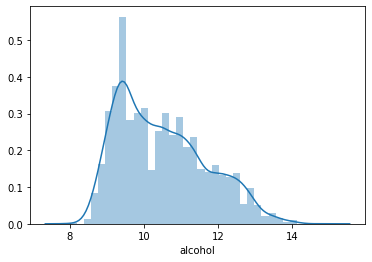

In [3]:
sns.distplot(wines['alcohol'])

- Automatic label on x axis
- Muted color palette
- KDE plot
- Narrow bins

### Compare to matplotlib histogram

(array([4.000e+01, 1.133e+03, 1.662e+03, 1.156e+03, 1.092e+03, 6.280e+02,
        5.690e+02, 1.750e+02, 4.100e+01, 1.000e+00]),
 array([ 8.  ,  8.69,  9.38, 10.07, 10.76, 11.45, 12.14, 12.83, 13.52,
        14.21, 14.9 ]),
 <a list of 10 Patch objects>)

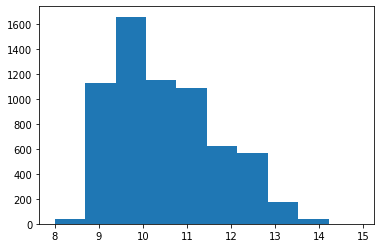

In [4]:
fig, ax = plt.subplots()
ax.hist(wines['alcohol'])

- Actual frequency of observations
- No automatic labels
- Wide bins

## Creating a Histogram in Seaborn
Distplot function has multiple optional arguments

To plot a simple histogram, disable the kde and
specify the number of bins to use

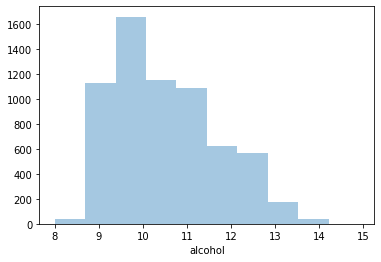

In [5]:
sns.distplot(wines['alcohol'], kde=False, bins=10)

## Alternate Data Distributions
- A rug plot is an alternative way to view the distribution of data
- A kde curve and rug plot can be combined

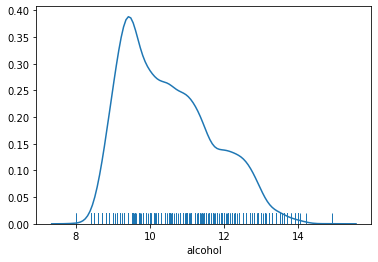

In [6]:
sns.distplot(wines['alcohol'], hist=False, rug=True)

Plenty of further customizations: https://seaborn.pydata.org/generated/seaborn.distplot.html

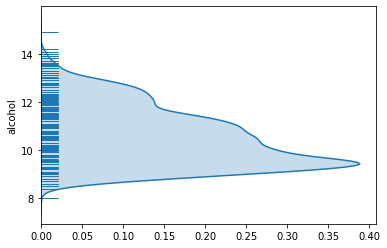

In [7]:
sns.distplot(wines['alcohol'], hist=False, rug=True, kde_kws={'shade':True} , vertical=True)

## Regression Plots in Seaborn 

- regplot function generates a scatter plot with a regression line
- must define data, x, and y variables

https://seaborn.pydata.org/generated/seaborn.regplot.html

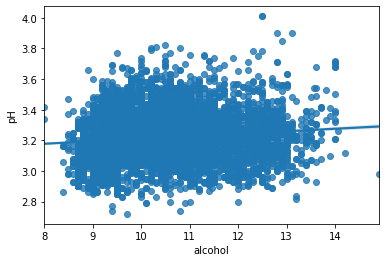

In [8]:
sns.regplot(data=wines, x="alcohol", y="pH")

## lmplot

- Plot data and regression model fits across a FacetGrid.
- Function combines regplot() and FacetGrid.
- Intended as a convenient interface to fit regression models across conditional subsets of a dataset.

https://seaborn.pydata.org/generated/seaborn.lmplot.html

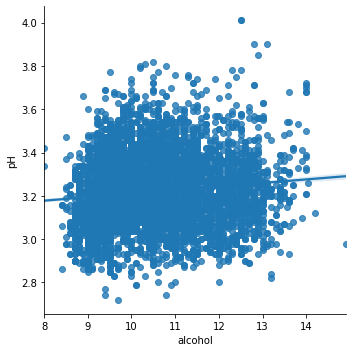

In [9]:
sns.lmplot(x="alcohol",
y="pH",
data=wines)

Organize data by columns (facetting)

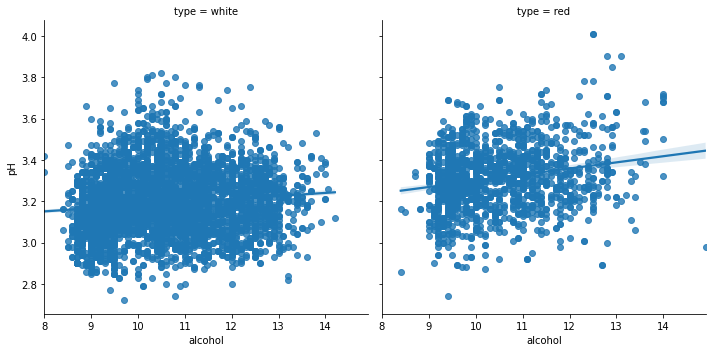

In [10]:
sns.lmplot(x="alcohol",y="pH",data=wines,col="type")

Organize data by colors (hue)

## Joint Plots

https://seaborn.pydata.org/generated/seaborn.jointplot.html

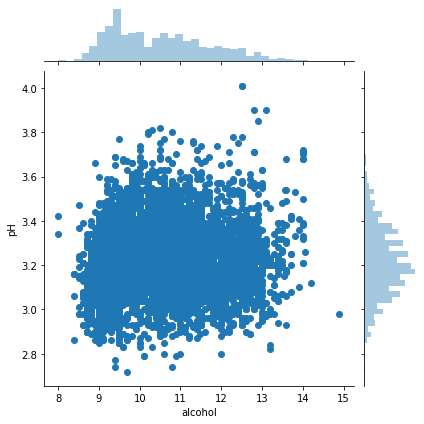

In [11]:
sns.jointplot(x="alcohol", y="pH", data=wines);

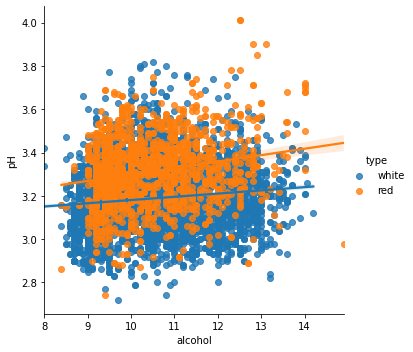

In [12]:
sns.lmplot(x="alcohol",y="pH",data=wines,hue="type")

## Pair Plot
Plot pairwise relationships in a dataset.

- function creates a grid of Axes such that each variable in data will by shared in the y-axis across a single row and in the x-axis across a single column
- The diagonal Axes are treated differently, drawing a plot to show the univariate distribution of the data for the variable in that column.

https://seaborn.pydata.org/generated/seaborn.pairplot.html

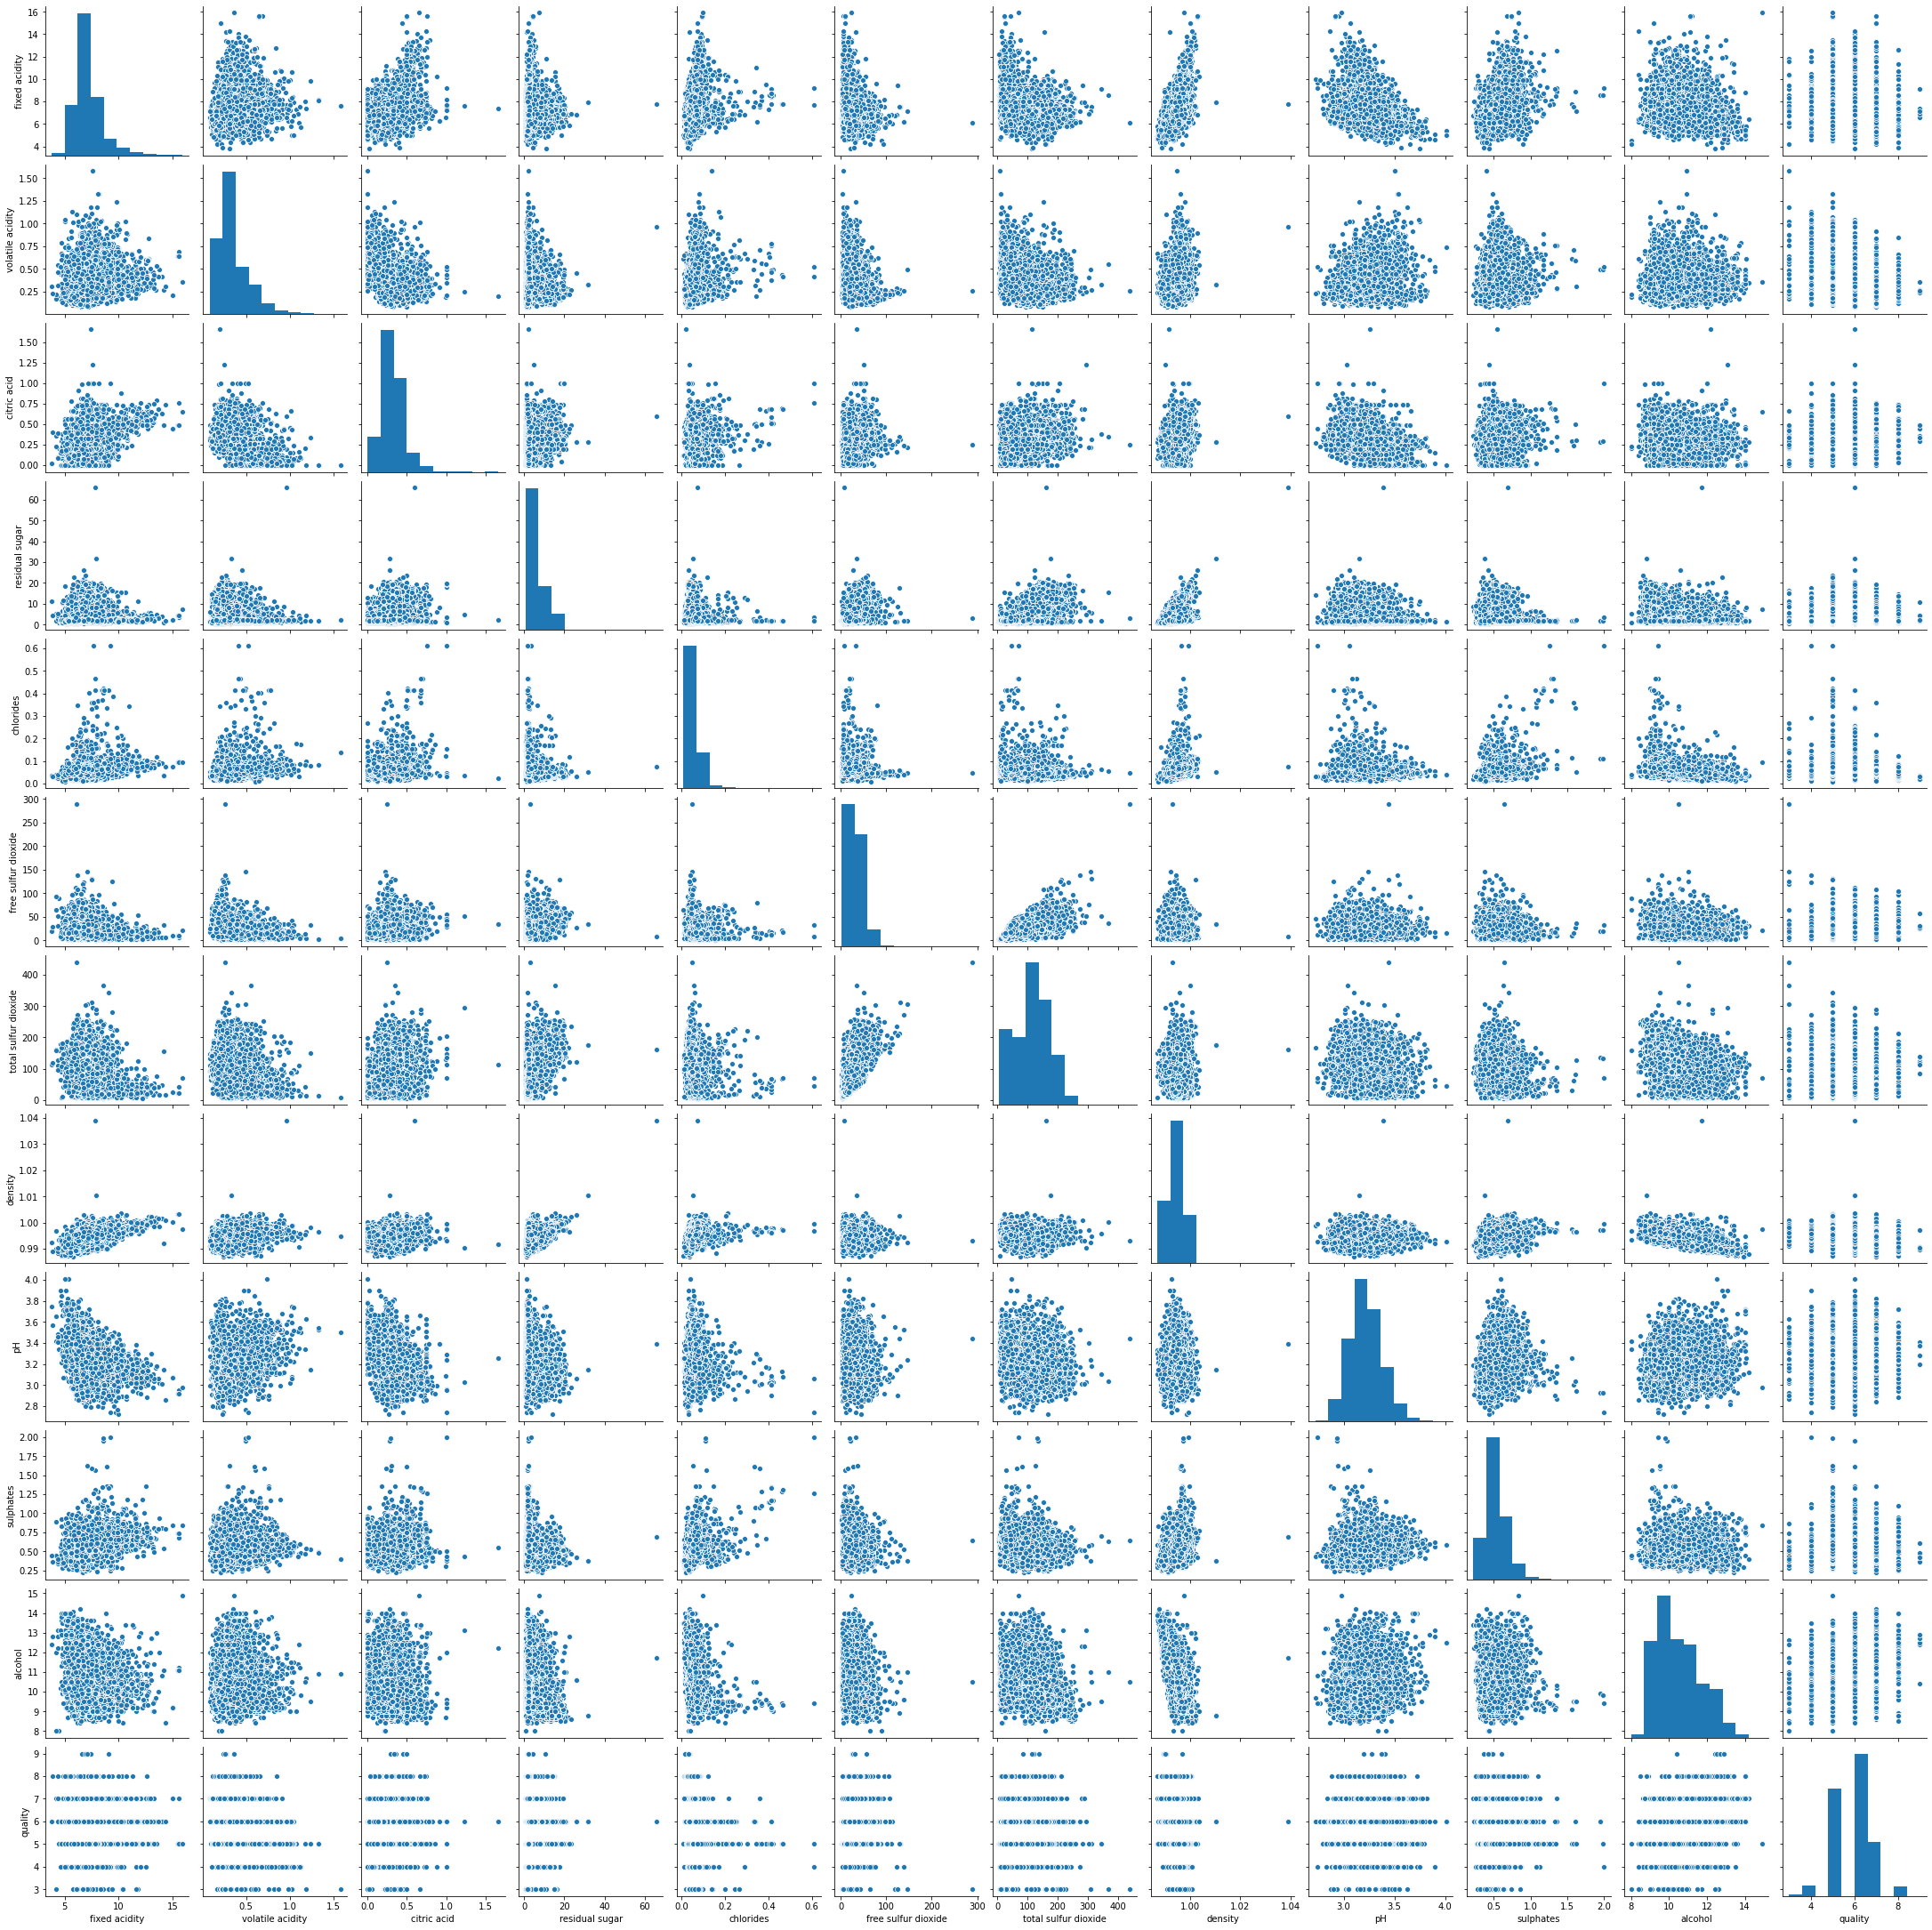

In [13]:
sns.pairplot(wines)

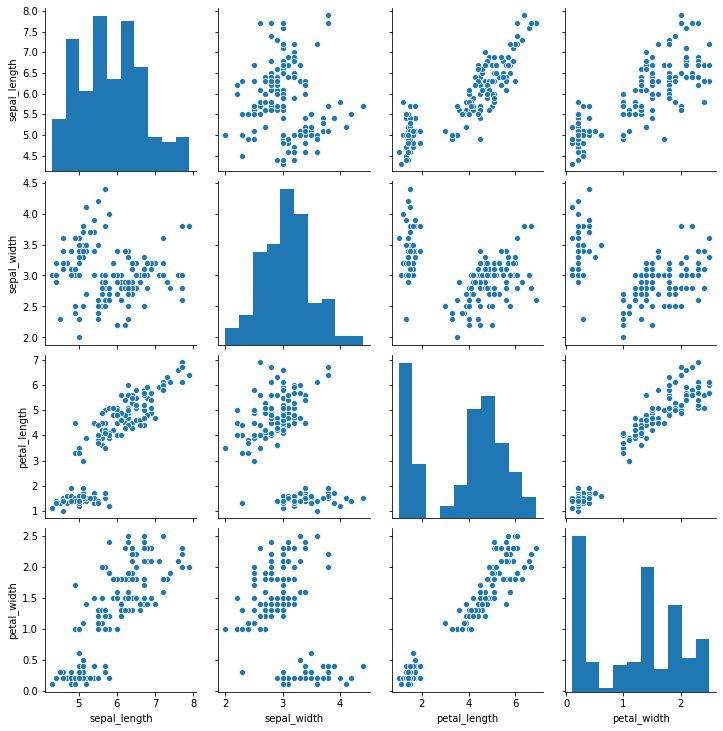

In [14]:
iris = sns.load_dataset("iris")
sns.pairplot(iris)

Show different levels of a categorical variable by the color of plot elements:

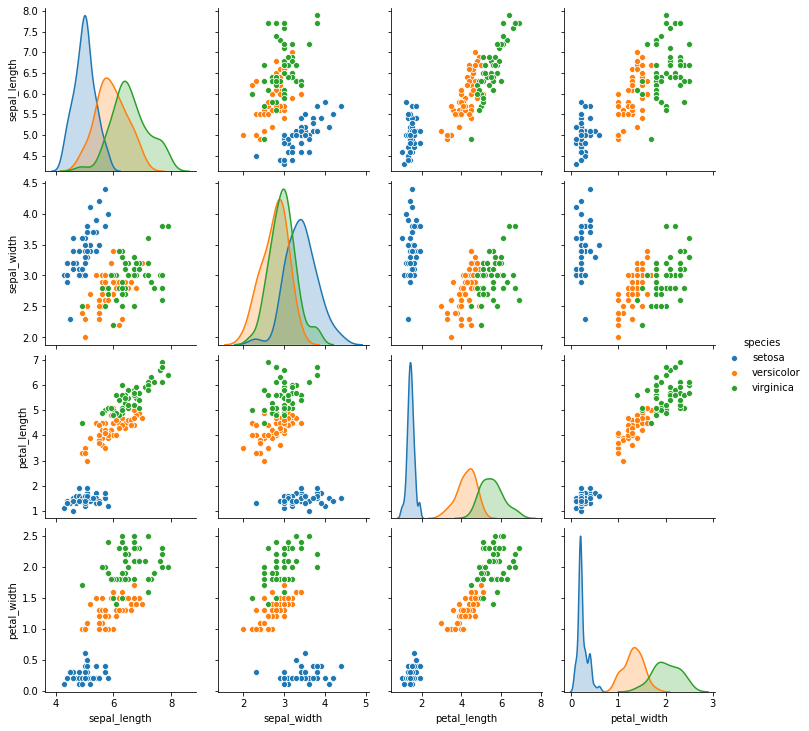

In [15]:
sns.pairplot(iris, hue="species")

## Setting Styles

https://seaborn.pydata.org/generated/seaborn.set_style.html

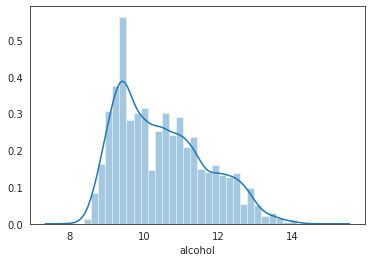

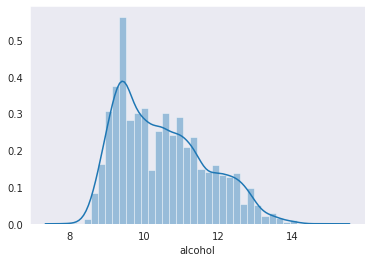

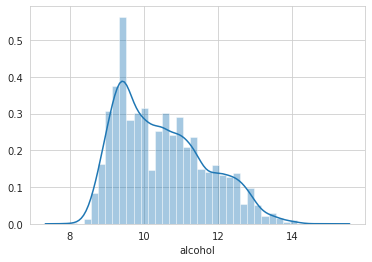

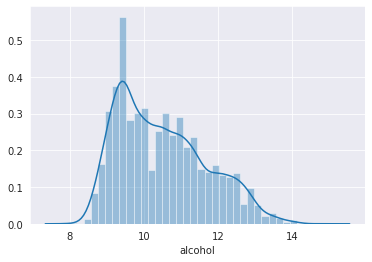

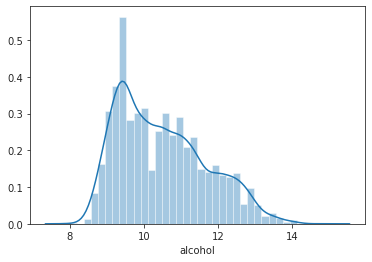

In [16]:
for style in ['white','dark','whitegrid','darkgrid','ticks']:
    sns.set_style(style)
    sns.distplot(wines['alcohol'])
    plt.show()

## Removing axes with despine()
- Sometimes plots are improved by removing elements
- Seaborn contains a shortcut for removing the spines of a plot


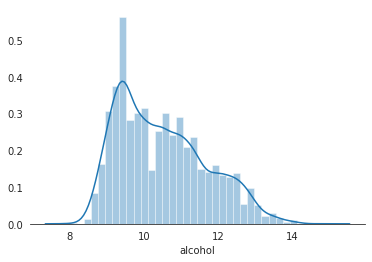

In [17]:
sns.set_style('white')
sns.distplot(wines['alcohol'])
sns.despine(left=True)

## Defining a color for a plot
Seaborn supports assigning colors to plots using matplotlib color codes

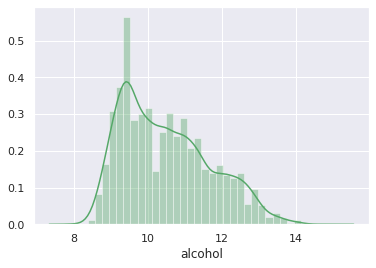

In [18]:
sns.set(color_codes=True)
sns.distplot(wines['alcohol'], color='g')

## Palettes
Seaborn uses the set_palette() function to define a palette

deep


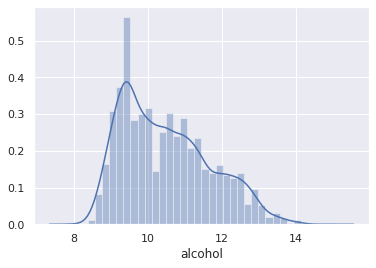

deep6


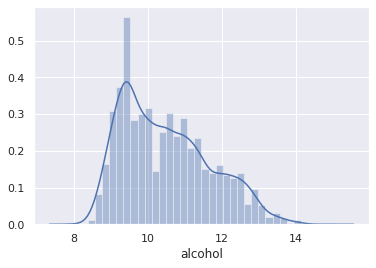

muted


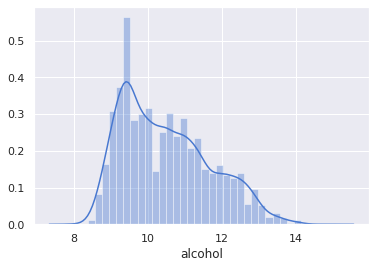

muted6


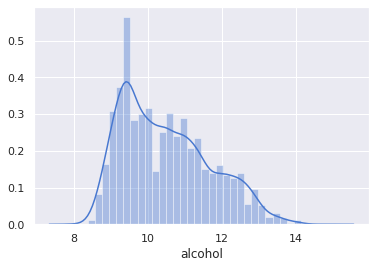

pastel


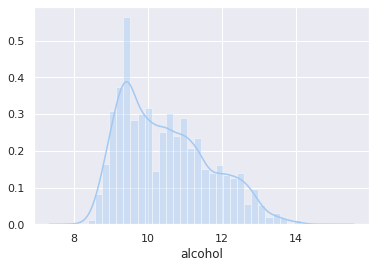

pastel6


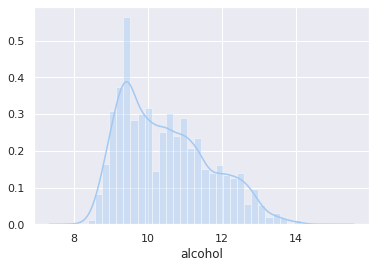

bright


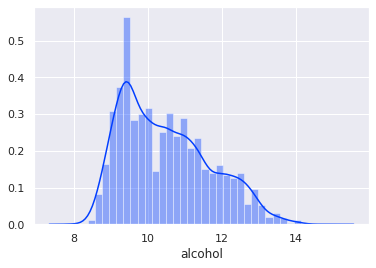

bright6


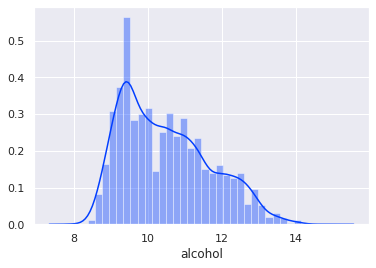

dark


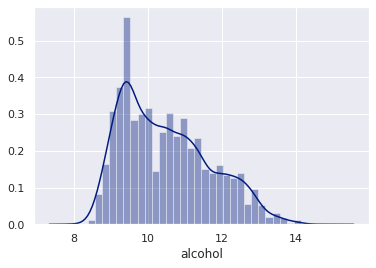

dark6


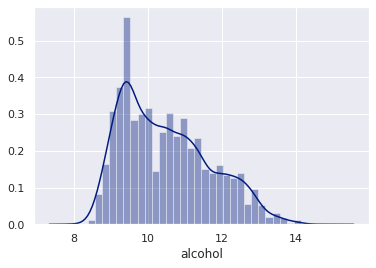

colorblind


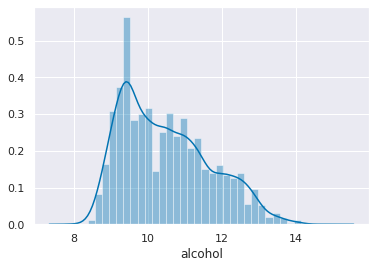

colorblind6


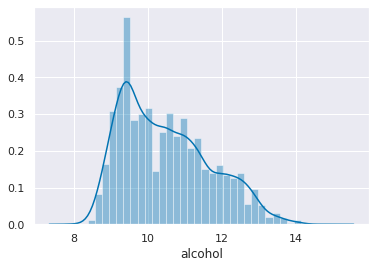

In [19]:
for p in sns.palettes.SEABORN_PALETTES:
    sns.set_palette(p)
    sns.distplot(wines['alcohol'])
    print(p)
    plt.show()

deep


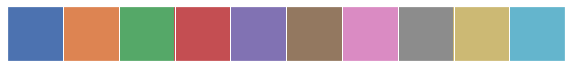

deep6


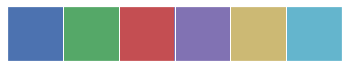

muted


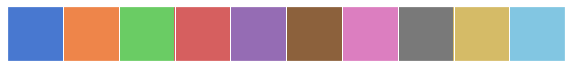

muted6


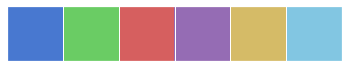

pastel


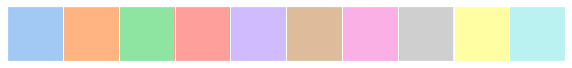

pastel6


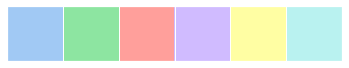

bright


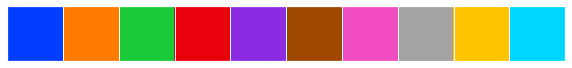

bright6


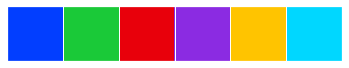

dark


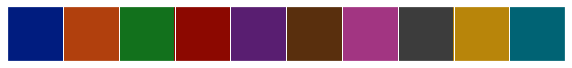

dark6


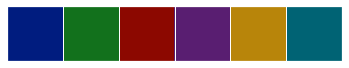

colorblind


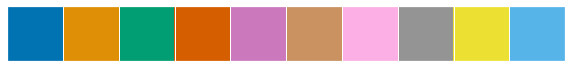

colorblind6


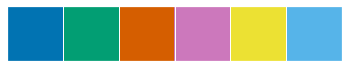

In [20]:
for p in sns.palettes.SEABORN_PALETTES:
    sns.set_palette(p)
    sns.palplot(sns.color_palette())
    print(p)
    plt.show()

## Defining Custom Palettes

Qualitative: Circular colors (data is not ordered)

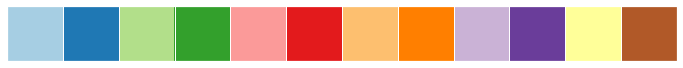

In [21]:
sns.palplot(sns.color_palette("Paired", 12))

Sequential colors = when
the data has a consistent
range from high to low

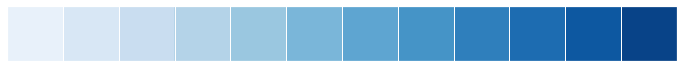

In [22]:
sns.palplot(sns.color_palette("Blues", 12))

Diverging colors = when both
the low and high values are
interesting

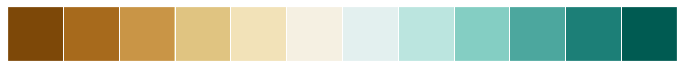

In [23]:
sns.palplot(sns.color_palette(
"BrBG", 12))

## Bar Plots

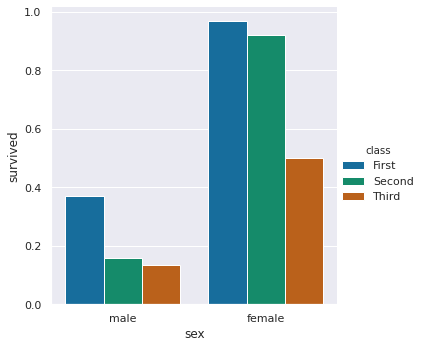

In [24]:
titanic = sns.load_dataset("titanic")
sns.catplot(x="sex", y="survived", hue="class", kind="bar", data=titanic, ci=None);

## Point Plots

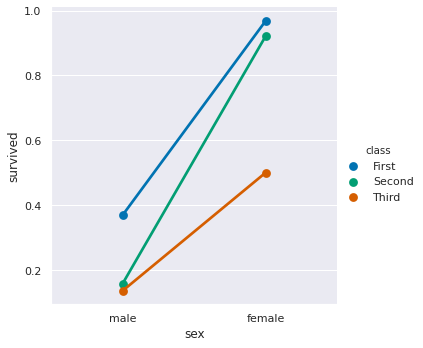

In [25]:
sns.catplot(x="sex", y="survived", hue="class", kind="point", data=titanic, ci=None);

## Box Plots

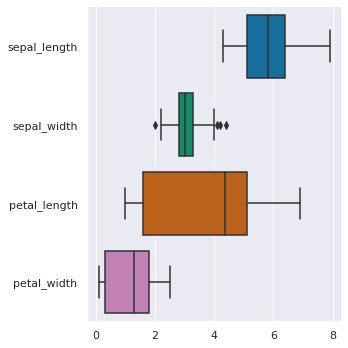

In [26]:
iris = sns.load_dataset("iris")
sns.catplot(data=iris, orient="h", kind="box");

## Violin Plot

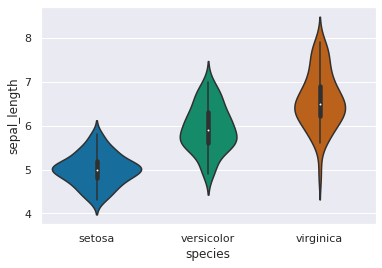

In [27]:
sns.violinplot(x=iris.species, y=iris.sepal_length);

## Examples
https://seaborn.pydata.org/examples/index.html

## Review Activity

Repeat creating these graphics, but use the mpg data used in the matplotlib notebook.